Import packages and data

In [1]:
import os
import pandas as pd
import numpy as np
%matplotlib inline
from scipy.stats import ttest_ind, ttest_ind_from_stats
import matplotlib.pyplot as plt

In [2]:
dir_path = os.path.join(os.path.sep,'Users', 'qianwu', 'Documents', 'GitHub', 'gender_paper','data')
behav_data_path = os.path.join(dir_path, 'USDA_Study_Database.xlsx')

behav_data = pd.read_excel(behav_data_path)

Add milk and egg experiment label

In [3]:
behav_data['experiment'] = np.where(behav_data['P_No']<=8050, 'milk', 'egg')

### Drop Missing Data
We obtained 93 observations with complete fMRI data. 
The missing 7 observation ids are 8010, 8032, 8037, 8059, 8062, 8065, 8084.

In [4]:
missiong_obs = [8010, 8032, 8037, 8059, 8062, 8065, 8084]
obs_data = behav_data[~behav_data ['P_No'].isin(missiong_obs)]
obs_data = obs_data.rename(columns={'DEM_9':'Edu', 'DEM_10':'Income'})

47 Females in total.

In [5]:
obs_data['Sex'].describe()

count         93
unique         2
top       Female
freq          47
Name: Sex, dtype: object

# 1. Age - Key Finding: No Significant difference between females and males
### t = -0.13, p-value = 0.90

In [6]:
obs_data['Age'].describe()

count    93.000000
mean     30.795699
std      10.389752
min      18.000000
25%      23.000000
50%      26.000000
75%      38.000000
max      55.000000
Name: Age, dtype: float64

In [7]:
age_female = obs_data['Age'][obs_data.Sex=='Female'].astype('float')
age_male = obs_data['Age'][obs_data.Sex=='Male'].astype('float')

t, p = ttest_ind(age_female, age_male, equal_var=False)
print("ttest_ind: t = %g  p = %g" % (t, p))

ttest_ind: t = -0.127147  p = 0.899106


# 2. BMI - Finding: No Significant difference between females and males
### t = -0.66  p = 0.51

In [8]:
obs_data['BMI'].describe()

count    93.000000
mean     26.308602
std       5.453114
min      18.400000
25%      22.400000
50%      24.900000
75%      29.400000
max      50.100000
Name: BMI, dtype: float64

In [9]:
obs_data['BMI_Status'].unique()

array(['Overweight (25-29.9)', 'Healthy Weight (18.5-24.9)',
       'Obese (>29.9)', 'Underweight (<18.5)'], dtype=object)

In [10]:
obs_data['BMI_Category'].unique()

array(['Overweight or Obese (>25)',
       'Underweight or Healthy Weight (<24.9)'], dtype=object)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

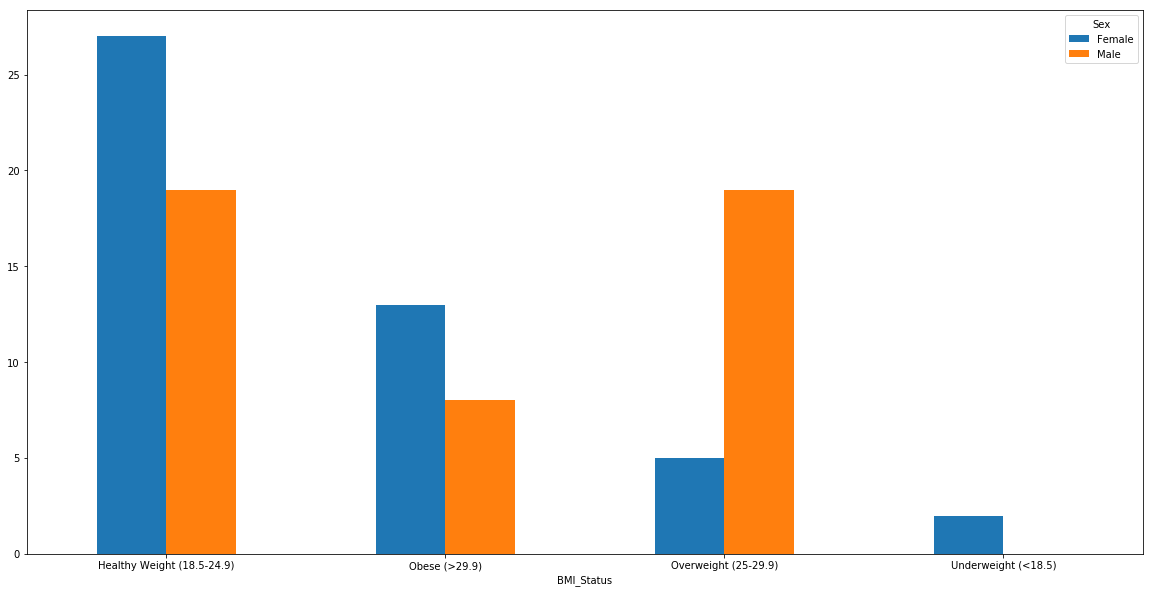

In [11]:
user_gender_BMI = obs_data.groupby(['BMI_Status', 'Sex']).size()
user_gender_BMI.unstack('Sex').plot.bar(figsize=(20,10))
plt.xticks(rotation=0)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

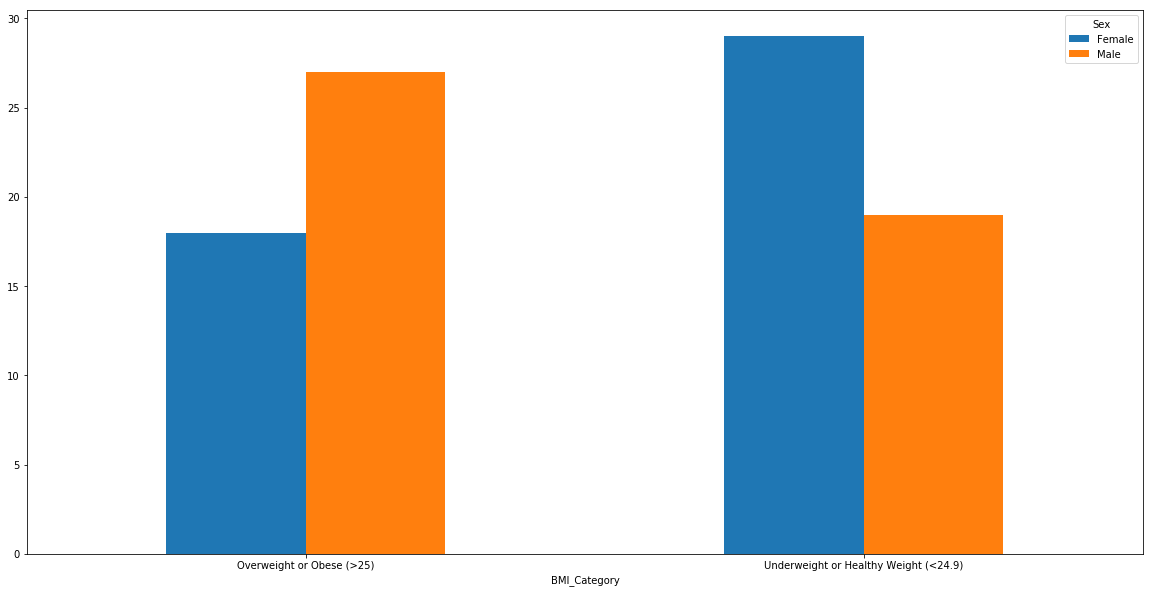

In [12]:
user_gender_BMI = obs_data.groupby(['BMI_Category', 'Sex']).size()
user_gender_BMI.unstack('Sex').plot.bar(figsize=(20,10))
plt.xticks(rotation=0)

In [13]:
bmi_female = obs_data['BMI'][obs_data.Sex=='Female']
bmi_male = obs_data['BMI'][obs_data.Sex=='Male']

t, p = ttest_ind(bmi_female, bmi_male, equal_var=False)
print("ttest_ind: t = %g  p = %g" % (t, p))

ttest_ind: t = -0.655351  p = 0.514172


# 3. Income - Finding: No Significant difference between females and males by using midpoints of income intervals from survey data. 
### t = -0.66  p = 0.51

In [14]:
obs_data['Income'].unique()

array(['$40,000 to $59,999', '$80,000 to $99,999', '$20,000 to $39,999',
       '$60,000 to $79,999', 'Less than $20,000', '$140,000 or more',
       '$120,000 to $139,999', '$100,000 to $119,999'], dtype=object)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

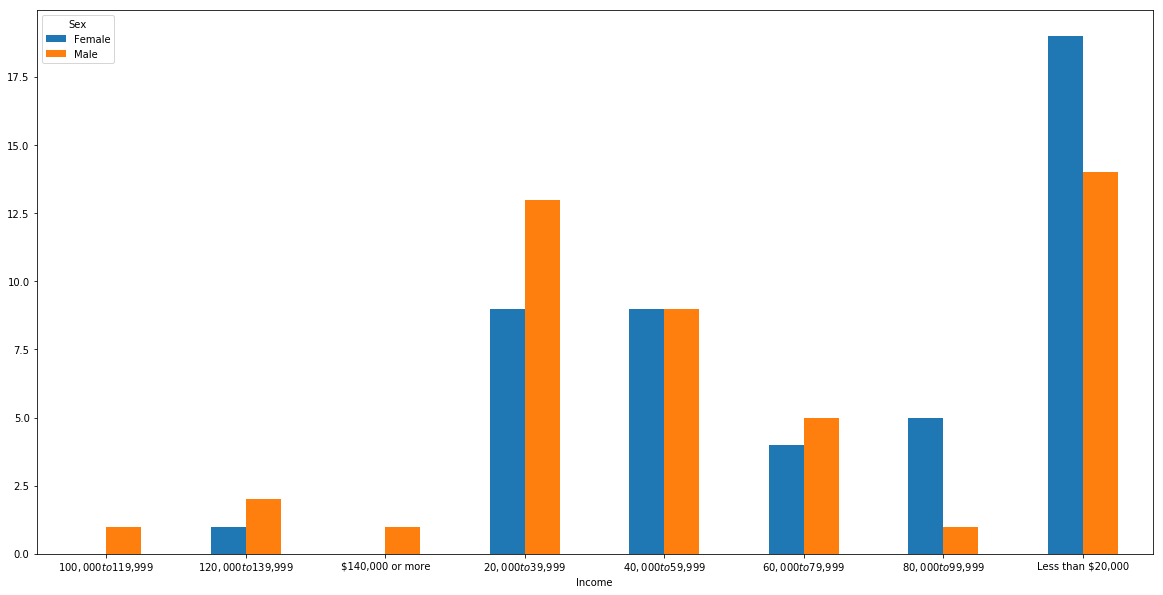

In [15]:
user_gender_income = obs_data.groupby(['Income', 'Sex']).size()
user_gender_income.unstack('Sex').plot.bar(figsize=(20,10))
plt.xticks(rotation=0)

In [16]:
income_level = np.array([[0, 20000],[20000, 39999], [40000, 59999], [60000, 79999]
                         ,[80000, 99999], [100000, 119999], [120000, 139999]])

In [17]:
np.mean(income_level, axis=1)

array([ 10000. ,  29999.5,  49999.5,  69999.5,  89999.5, 109999.5,
       129999.5])

In [18]:
midpoint = {'Less than $20,000':10000, 
            '$20,000 to $39,999':29999.5,
            '$40,000 to $59,999':49999.5, 
            '$60,000 to $79,999':69999.5, 
            '$80,000 to $99,999':89999.5, 
            '$100,000 to $119,999':109999.5,
            '$120,000 to $139,999':129999.5,
            '$140,000 or more': 149999.5
            }
obs_data = obs_data.replace({"Income": midpoint})

In [19]:
income_female = obs_data['Income'][obs_data.Sex=='Female'].astype('float')
income_male = obs_data['Income'][obs_data.Sex=='Male'].astype('float')

t, p = ttest_ind(income_female, income_male, equal_var=False)
print("ttest_ind: t = %g  p = %g" % (t, p))

ttest_ind: t = -0.663574  p = 0.508681


# 4. Education - This distribution doesn't seem difference. Hard to conduct a numerical test for categorial educational levels. 

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

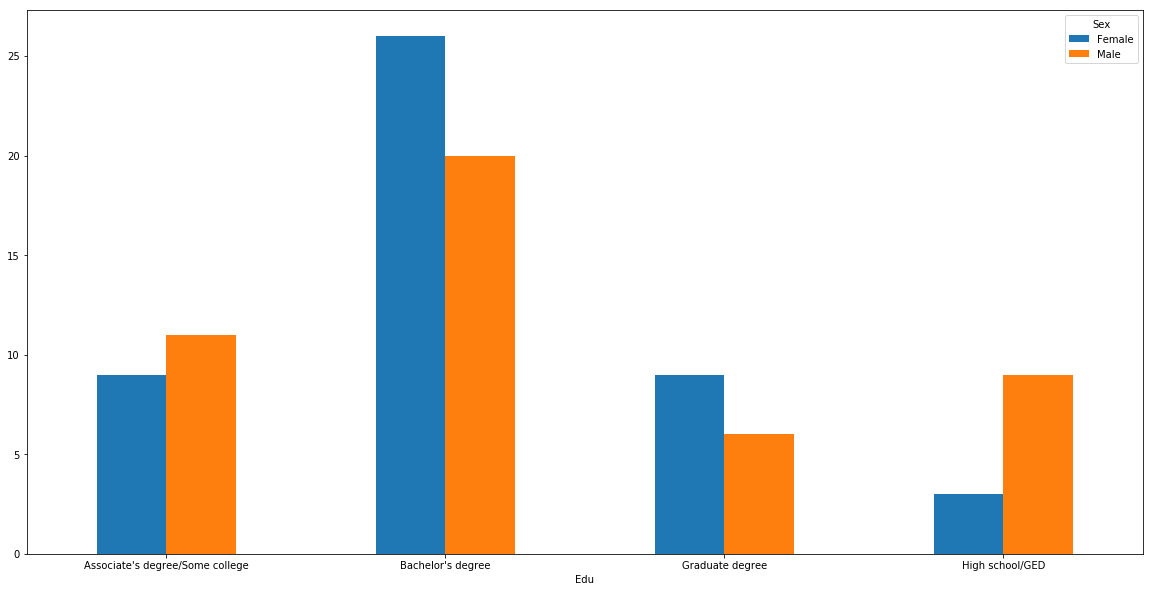

In [20]:
user_gender_edu = obs_data.groupby(['Edu', 'Sex']).size()
user_gender_edu.unstack('Sex').plot.bar(figsize=(20,10))
plt.xticks(rotation=0)